### このコードではMNISTデータセットを使って，手書き数字を認識するモデルを作ります

# ライブラリ
- ここでは必要なライブラリをインポートします
- PyTroch: ニューラルネットワークを構築・学習するためのライブラリです
- matplotlib: グラフ描画のためのライブラリです

In [ ]:
# PyTorchというライブラリ。ニューラルネットワークを作るのにとても便利です。
import torch 
# ニューラルネットワークの「層」を作るための機能が入っています。
import torch.nn as nn 
# モデルを賢くするための「学習方法」が入っています。
import torch.optim as optim 
# データセットを扱いやすくするための機能です。
from torch.utils.data import DataLoader 
# 画像データを扱うのに便利なライブラリです。特にMNISTデータセットなどが含まれています。
from torchvision import datasets, transforms 

# グラフを描くためのライブラリです。学習の様子などを可視化するのに使います。
import matplotlib.pyplot as plt 

# 進捗を表示するためのライブラリです。学習の進行状況を見やすくします。
from tqdm import tqdm 

# デバイス指定
- 学習で計算する際，どこで計算するかを指定します.
- GPUを使えば高速な計算を行えます（colabでは優秀なGPUであるT4が使えますが使用時間制限があるので注意が必要です）

In [ ]:
if torch.cuda.is_available():
    # GPUが使える場合はGPUを使います。
    # ここではCUDAという技術を使って、GPUを利用します。
    # CUDAはNVIDIAのGPUを使うための技術です。
    
    device = torch.device('cuda') 
else:
    # もしNVIDIAのGPUがない場合は、CPUを使います。
    device = torch.device('cpu')

# 確認
print(device)

cpu


# ハイパーパラメータ
モデルの学習プロセスを制御するための設定装置です
- batch_size: 一度に学習させるデータの数を指定します
- lr : 学習率。モデルの重みをどれだけ更新するかの度合いを指定します
- num_epochs: データセット全体を何回学習させるかを指定します

In [ ]:
# 一度に学習するデータの数を設定します。
batch_size = 64
# モデルがどれだけ速く学習するかを設定します。
learning_rate = 0.01
# 学習の繰り返し回数を設定します。
num_epochs = 10

# データセット
- MNISTという名前のデータセットを使います
- 0から9までの手書き数字の画像が70,000枚あります
- そのうち，60,000枚が学習用，10,000枚がテスト用になっています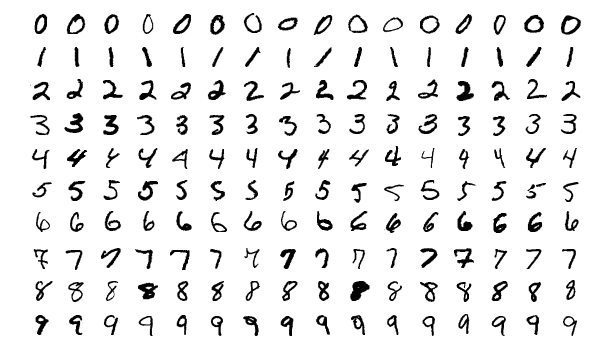

In [ ]:
# 画像データをそのままPyTorchで扱って学習させるのはやや困難です
# そのため，画像データを`テンソル`に変換し，0-255の値を0-1に変換しています
# このように，機械学習では，生のデータを直接使うのではなく`前処理`することで，学習を行いやすくします
# Pytorchのtorchvisionでは，データの取得から変換までを行ってくれるので，今回はこれをありがたく使用します
# ほかにもデータセットの準備方法はいろいろあります．興味があればぜひ調べ，自身の環境でためしてみてください

# MNISTの訓練用データを取得
train_dataset = datasets.MNIST(
    root = './data',                   # データを保存するディレクトリ
    train = True,                      # 学習用データを取得（Trueで訓練用データ）
    transform = transforms.ToTensor(), # 画像データをテンソルに変換し、0-255を0-1に正規化
    download = True                    # データがなければ自動でダウンロード
)

# データローダーの作成
train_loader = DataLoader(
    train_dataset,           # 使用するデータセット
    batch_size = batch_size, # 1回の学習で使うデータ数（バッチサイズ）
    shuffle = True           # データを毎回シャッフルして学習
)

# MNISTのテスト用データを取得
test_dataset = datasets.MNIST(
    root = './data',                 # 保存先ディレクトリ
    train = False,                   # テスト用データを取得（Falseでテスト用データ）
    transform = transforms.ToTensor()# テンソルに変換＆正規化
)

# データローダーの作成
test_loader = DataLoader(
    test_dataset,            # 使用するデータセット
    batch_size = batch_size, # バッチサイズ
    shuffle = False          # テスト時は順番を固定
)

# --- Copy de ok ---
torch.set_printoptions(linewidth=1000) # テンソル表示の幅を広げる（見やすくするため）
print(train_dataset[0][0].shape)       # 画像データのshape（チャンネル数, 高さ, 幅）を表示
idx=1 # ここを変えると表示される文字も変わる
print(f'表示している文字: {train_dataset[idx][1]}') # idx番目のラベル（数字）を表示
print(train_dataset[idx][0])           # idx番目の画像データ（テンソル）を表示

100%|██████████| 9.91M/9.91M [00:00<00:00, 58.5MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.75MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 14.6MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.56MB/s]

torch.Size([1, 28, 28])
表示している文字: 0
tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000